#                        Projet sur les cantines

### 1 - Consignes et livrables

Travail de groupe de 2 personnes. 

Rendu individuel sur simplonline

### 2 - Brief du projet 

   
La cuisine centrale de Nantes Métropole produit par jour entre 15 000 et 16 000 repas qui sont livrés dans 87 établissements. Les familles ont la
possibilité d’inscrire ou non les enfants le jour même. 

Ce système entraine une grande variabilité dans la fréquentation. Celle-ci est eCectivement
impactée  par  le  contexte  sanitaire,  la  composition  des  menus,  le  jour  de  la  semaine,  la  période  de  l’année...  

Cette  variabilité  contraint  les
cantines, très en amont (S-3), à estimer systématiquement le nombre de convives. Ces estimations servent à évaluer les quantités à commander
aux fournisseurs. Un constat : le gaspillage alimentaire sur l’ensemble de la métropole est passée de 5% en moyenne entre 2011 et 2016 à 8% sur
2017-2019.

Nantes métropole souhaite fiabiliser les commandes des cantines. 

Le chef de projet de Nantes métropole vous demande donc d'analyser les
données afin de trouver les facteurs qui influencent la fréquentation des cantines et de proposer une solution pour réduire le gaspillage (un modèle statistique par exemple).

### 3 - Organisation du service 

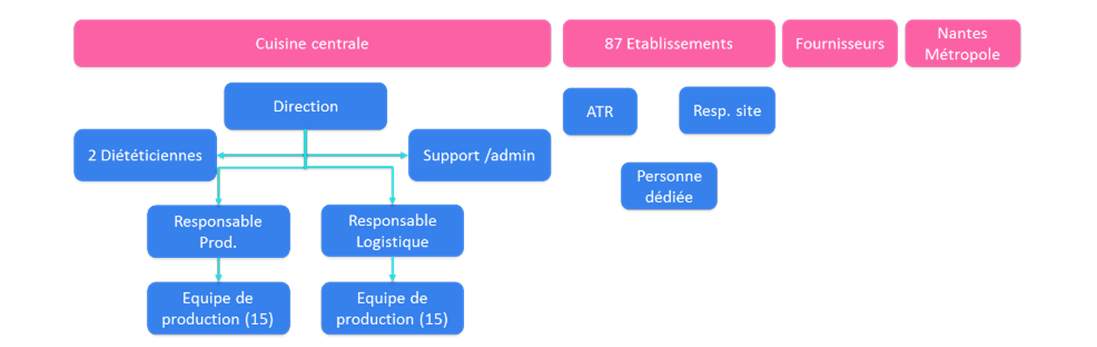

### 4 - Processus actuel

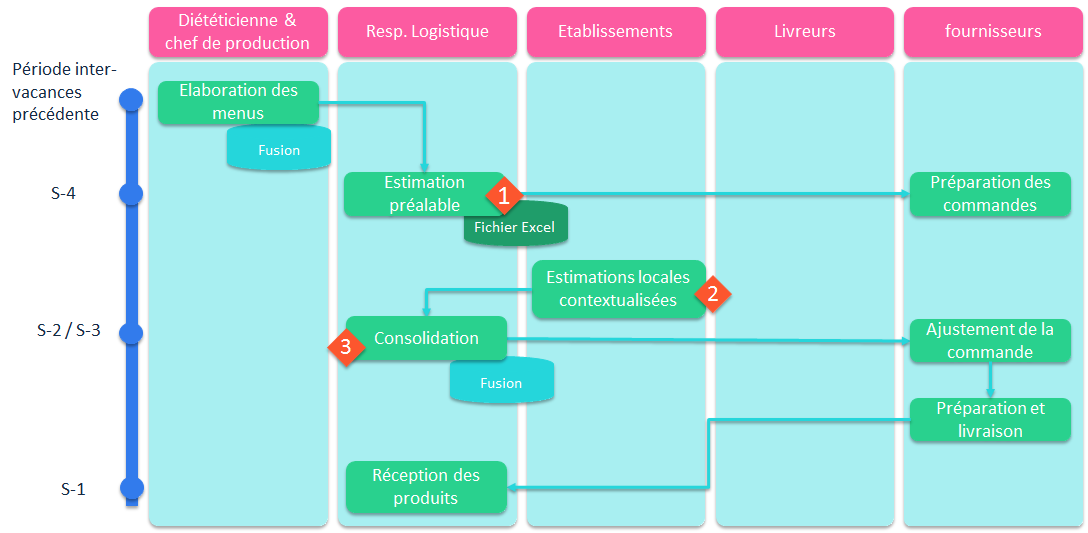

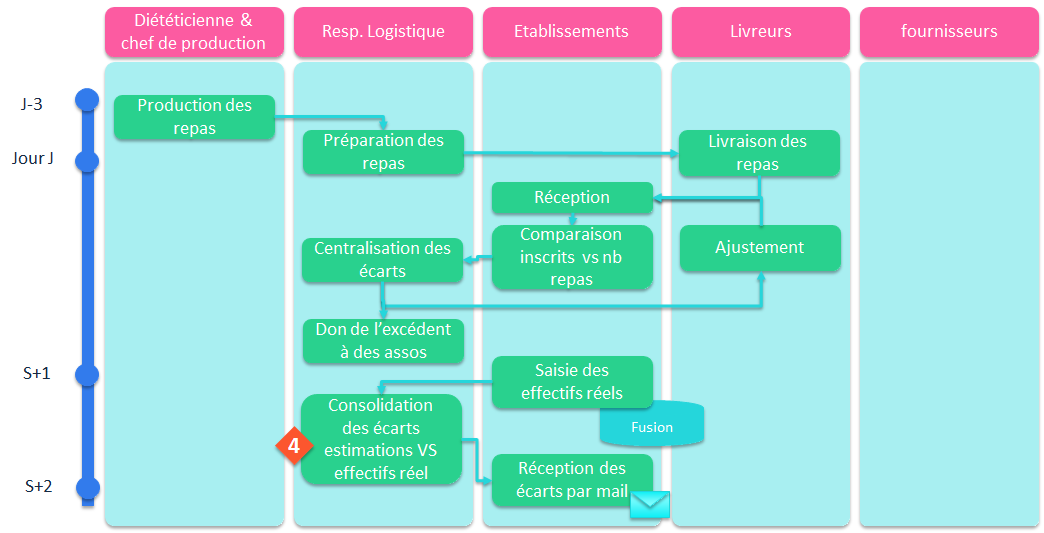

Les entêtes de colonnes indiquent les acteurs mobilisés ; 

l’axe vertical à gauche du graphique indique la position de chaque étape par rapport au jour de consommation (S = semaine et J = jour) ; 

les blocs verts indiquent les étapes du processus de planification, réalisation et suivi de la production  ; les blocs bleus indiquent les outils numériques utilisés ; 

les losanges orange indiquent les étapes auxquelles les outils de modélisation peuvent être utilisés.

Les quatre losanges mis en évidence en orange sur le schéma représentent les étapes auxquelles des interactions peuvent être développées entre l’outil de modélisation statistique et le processus de préparation des repas de la cuisine centrale à Nantes. 

Une fois les menus pour une période intervacances validés par la commission de restauration, ils sont transmis au responsable logistique. Celui-ci réalise des estimations globales de la fréquentation attendue et passe ses commandes auprès des fournisseurs locaux environ un mois à l’avance. L'objectif de votre travail est de fiabiliser cette étape (losange 1) à l'aide d'un modèle statistique.



### 5 - Les données 

https://www.dropbox.com/s/q8m65klc49380h2/projet_cantines.csv?dl=0
    

### 6 - Votre mission 


Analyser le jeu de données afin de repérer des variables pertinentes pour la mission. 

Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. 

Nettoyer le jeu de données : identifier les colonnes inutiles (variables non pertinentes) et vérifier si toutes les lignes sont exploitables 

Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement. Variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.

Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée (plusieurs variables). Le plus important sera de déterminer les facteurs qui jouent le plus sur la fréquentation.

Identifier des arguments justifiant la faisabilité d'une fiabilisation des commandes en utilisant un modèle statistique. Est-ce possible d'après vous ?






### 7 - Recommandations

Le nombre de repas consommés par jour dépend fortement de l’effectif global (somme des effectifs de 87 établissements), or cet effectif a évolué sur les 10 ans d’historique. 

Pour les analyses, je vous recommande de créer dans votre dataframe une colonne correspondant à la fréquentation, c’est-à-dire au nombre de repas consommés par jour divisé par l’effectif global. En analysant la fréquentation, on ne tient pas compte de l’effet d’échelle de l’effectif.


Par ailleurs, je vous recommande de filtrer les fréquentations anormalement basse. Cela correspond à des jours où il y a du avoir des grèves. Or on ne pourra prédire les grèves. 

In [169]:
import pandas as pd

In [170]:
data = pd.read_csv("projet_cantines.csv", sep=",")

In [171]:
data.head()

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,...,bio,noel,frites,an_chinois,gaspillage_volume,gaspillage_pourcentagereel_moyen_annee,reel_std_annee,prevision,reel,effectif
0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,0,...,0,0,0,0,1160,NaN,3032.860872,12289,11129,17373
1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,0,...,0,0,0,0,750,NaN,3032.860872,12558,11808,17373
2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,0,...,1,0,0,0,1012,NaN,3032.860872,12753,11741,17373
3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,0,...,0,0,0,0,490,NaN,3032.860872,12812,12322,17373
4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,0,...,0,0,0,0,1007,NaN,3032.860872,12309,11302,17373


In [172]:
data.columns

Index(['date', 'annee_scolaire', 'jour', 'semaine', 'mois', 'greves', 'ferie',
       'veille_ferie', 'retour_ferie', 'vacances', 'retour_vacances',
       'veille_vacances', 'fete_musulmane', 'ramadan', 'fete_chretienne',
       'fete_juive', 'inc_grippe', 'inc_gastro', 'inc_varicelle', 'menu',
       'porc', 'viande', 'poisson', 'bio', 'noel', 'frites', 'an_chinois',
       'gaspillage_volume', 'gaspillage_pourcentagereel_moyen_annee',
       'reel_std_annee', 'prevision', 'reel', 'effectif'],
      dtype='object')

c:\bda\tools\python-3.6.8-amd64\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\bda\tools\python-3.6.8-amd64\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


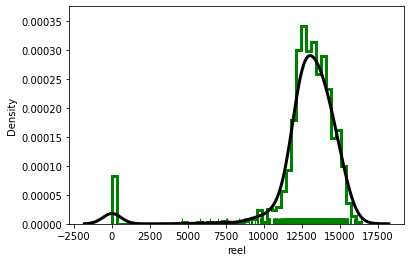

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.distplot(data.reel, rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

# Tri sur les valeurs

In [174]:
#on commence par retirer les valeurs nulles
data = data[data.reel>0]

init = len(data)
print(data.shape)

(1156, 33)


In [175]:
# on créé la colonne fréquentation

data["freq"] = data.reel/data.effectif*100

<AxesSubplot:>

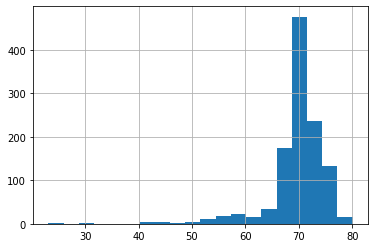

In [176]:
# on regarde le un histogramme
data["freq"].hist(bins=20)

In [177]:
data.columns

Index(['date', 'annee_scolaire', 'jour', 'semaine', 'mois', 'greves', 'ferie',
       'veille_ferie', 'retour_ferie', 'vacances', 'retour_vacances',
       'veille_vacances', 'fete_musulmane', 'ramadan', 'fete_chretienne',
       'fete_juive', 'inc_grippe', 'inc_gastro', 'inc_varicelle', 'menu',
       'porc', 'viande', 'poisson', 'bio', 'noel', 'frites', 'an_chinois',
       'gaspillage_volume', 'gaspillage_pourcentagereel_moyen_annee',
       'reel_std_annee', 'prevision', 'reel', 'effectif', 'freq'],
      dtype='object')

## Regardons l'impact des grèves 

On va faire une ANOVA

In [178]:
data.groupby('greves').freq.mean()

greves
0    70.236324
1    63.358657
Name: freq, dtype: float64

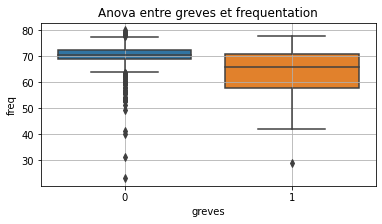

In [179]:
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='greves',y="freq",data=data, showfliers=True)
plt.title('Anova entre greves et frequentation')
plt.grid()
plt.show()

In [180]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [181]:
lm = ols('freq ~ greves', data = data).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)

In [182]:
table

,df,sum_sq,mean_sq,F,PR(>F)
greves,1.0,3725.056449,3725.056449,144.252356,2.135235e-31
Residual,1154.0,29799.964833,25.823193,NaN,NaN


la pvaleur est quasi nulle -> il y a bien une corrélation 

On va supprimer les jours avec grève 

In [183]:
data = data[data.greves==0]
data

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,...,noel,frites,an_chinois,gaspillage_volume,gaspillage_pourcentagereel_moyen_annee,reel_std_annee,prevision,reel,effectif,freq
0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,0,...,0,0,0,1160,NaN,3032.860872,12289,11129,17373,64.059172
1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,0,...,0,0,0,750,NaN,3032.860872,12558,11808,17373,67.967536
2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,0,...,0,0,0,1012,NaN,3032.860872,12753,11741,17373,67.581880
3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,0,...,0,0,0,490,NaN,3032.860872,12812,12322,17373,70.926150
4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,0,...,0,0,0,1007,NaN,3032.860872,12309,11302,17373,65.054970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,2019-11-28,2019-2020,Jeudi,48,Novembre,0,0,0,0,0,...,0,0,0,968,NaN,1898.521202,15832,14864,20685,71.858835
1180,2019-11-29,2019-2020,Vendredi,48,Novembre,0,0,0,0,0,...,0,0,0,778,NaN,1898.521202,17201,16423,20685,79.395697
1181,2019-12-02,2019-2020,Lundi,49,Decembre,0,0,0,0,0,...,0,0,0,886,NaN,1898.521202,16151,15265,20685,73.797438
1183,2019-12-09,2019-2020,Lundi,50,Decembre,0,0,0,0,0,...,0,0,0,5093,NaN,1898.521202,15991,10898,20685,52.685521


In [184]:
# suppression des gaspillages excessifs (liés aux greves??)
data = data[(data.gaspillage_volume < 2000)  | (data.gaspillage_volume< -2000) ]
data.describe

<bound method NDFrame.describe of             date annee_scolaire      jour  semaine      mois  greves  ferie  \
0     2011-01-03      2010-2011     Lundi        1   Janvier       0      0   
1     2011-01-04      2010-2011     Mardi        1   Janvier       0      0   
2     2011-01-06      2010-2011     Jeudi        1   Janvier       0      0   
3     2011-01-07      2010-2011  Vendredi        1   Janvier       0      0   
4     2011-01-10      2010-2011     Lundi        2   Janvier       0      0   
...          ...            ...       ...      ...       ...     ...    ...   
1177  2019-11-25      2019-2020     Lundi       48  Novembre       0      0   
1178  2019-11-26      2019-2020     Mardi       48  Novembre       0      0   
1179  2019-11-28      2019-2020     Jeudi       48  Novembre       0      0   
1180  2019-11-29      2019-2020  Vendredi       48  Novembre       0      0   
1181  2019-12-02      2019-2020     Lundi       49  Decembre       0      0   

      veille_feri

In [185]:
# suppression des greves
data[data.greves==0]

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,...,noel,frites,an_chinois,gaspillage_volume,gaspillage_pourcentagereel_moyen_annee,reel_std_annee,prevision,reel,effectif,freq
0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,0,...,0,0,0,1160,NaN,3032.860872,12289,11129,17373,64.059172
1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,0,...,0,0,0,750,NaN,3032.860872,12558,11808,17373,67.967536
2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,0,...,0,0,0,1012,NaN,3032.860872,12753,11741,17373,67.581880
3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,0,...,0,0,0,490,NaN,3032.860872,12812,12322,17373,70.926150
4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,0,...,0,0,0,1007,NaN,3032.860872,12309,11302,17373,65.054970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,2019-11-25,2019-2020,Lundi,48,Novembre,0,0,0,0,0,...,0,0,0,737,NaN,1898.521202,15880,15143,20685,73.207638
1178,2019-11-26,2019-2020,Mardi,48,Novembre,0,0,0,0,0,...,0,0,0,-107,NaN,1898.521202,15847,15954,20685,77.128354
1179,2019-11-28,2019-2020,Jeudi,48,Novembre,0,0,0,0,0,...,0,0,0,968,NaN,1898.521202,15832,14864,20685,71.858835
1180,2019-11-29,2019-2020,Vendredi,48,Novembre,0,0,0,0,0,...,0,0,0,778,NaN,1898.521202,17201,16423,20685,79.395697


<AxesSubplot:>

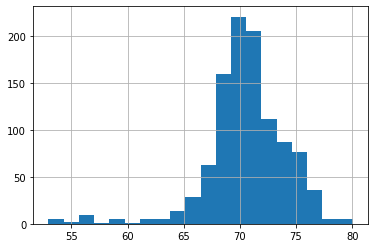

In [186]:
data.freq.hist(bins= 20)

Il reste des jours où le fréquentation est très basse

<AxesSubplot:>

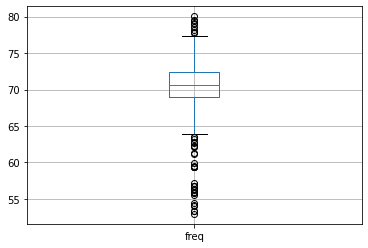

In [187]:
data.boxplot( column=["freq"])

In [188]:
seuil = 60

data = data[data.freq>seuil]

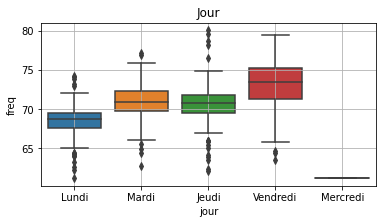

In [189]:
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='jour',y="freq",data=data, showfliers=True)
plt.title('Jour')
plt.grid()
plt.show()

In [190]:
data.jour.unique()

array(['Lundi', 'Mardi', 'Jeudi', 'Vendredi', 'Mercredi'], dtype=object)

In [191]:
data = data[~(data.jour == "Mercredi")]

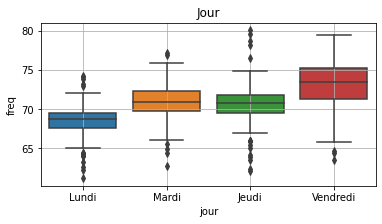

In [192]:
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='jour',y="freq",data=data, showfliers=True)
plt.title('Jour')
plt.grid()
plt.show()

In [193]:
lm = ols('freq ~ jour', data = data).fit()
import statsmodels.api; 
table2 = sm.stats.anova_lm(lm)

In [194]:
table2

,df,sum_sq,mean_sq,F,PR(>F)
jour,3.0,2839.894483,946.631494,176.714331,2.957158e-92
Residual,1020.0,5463.983147,5.356846,NaN,NaN


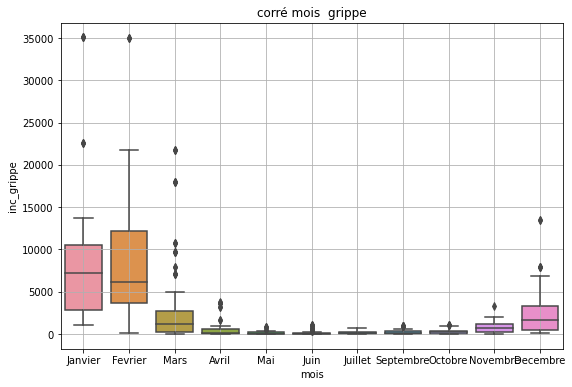

In [195]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='mois',y="inc_grippe",data=data, showfliers=True)
plt.title('corré mois  grippe')
plt.grid()
plt.show()

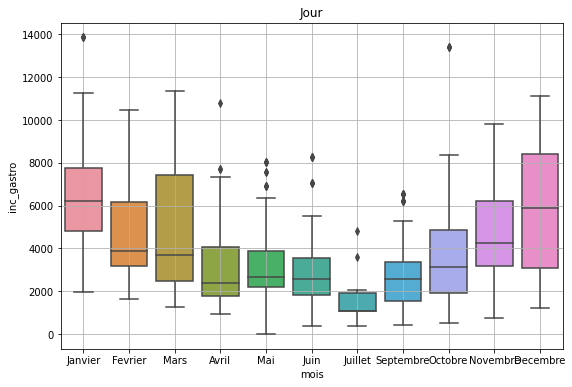

In [196]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='mois',y="inc_gastro",data=data, showfliers=True)
plt.title('Jour')
plt.grid()
plt.show()

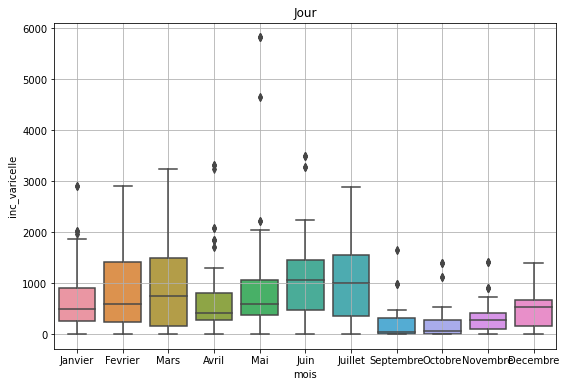

In [197]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='mois',y='inc_varicelle',data=data, showfliers=True)
plt.title('Jour')
plt.grid()
plt.show()

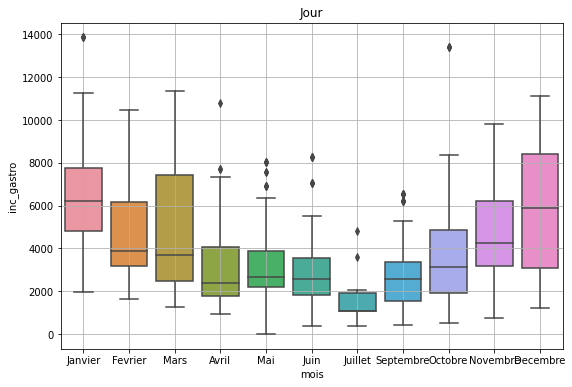

In [198]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='mois',y="inc_gastro",data=data, showfliers=True)
plt.title('Jour')
plt.grid()
plt.show()

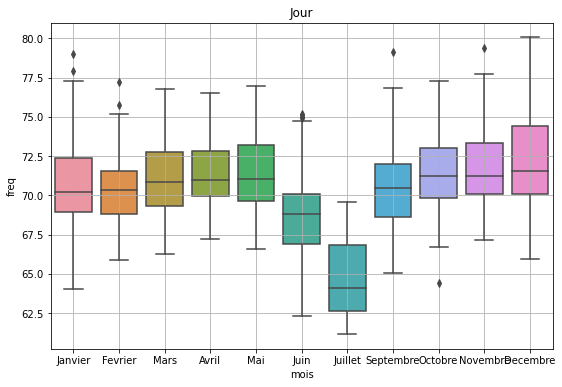

In [199]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='mois',y="freq",data=data, showfliers=True)
plt.title('Jour')
plt.grid()
plt.show()

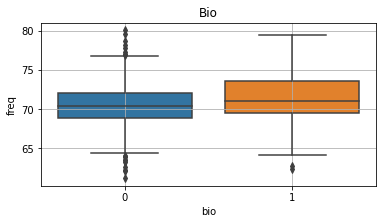

In [200]:
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='bio',y="freq",data=data, showfliers=True)
plt.title('Bio')
plt.grid()
plt.show()

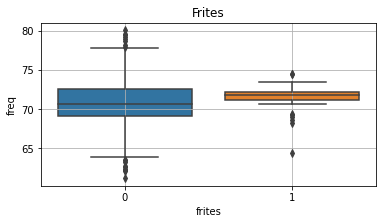

In [201]:
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='frites',y="freq",data=data, showfliers=True)
plt.title('Frites')
plt.grid()
plt.show()

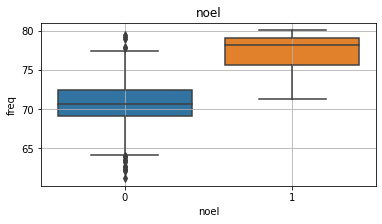

In [202]:
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='noel',y="freq",data=data, showfliers=True)
plt.title('noel')
plt.grid()
plt.show()

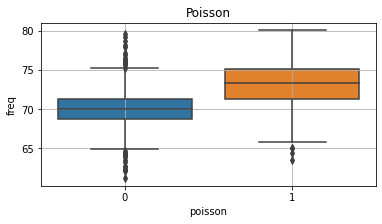

In [203]:
fig = plt.figure(1, figsize=(6,3))
sns.boxplot(x='poisson',y="freq",data=data, showfliers=True)
plt.title('Poisson')
plt.grid()
plt.show()

In [204]:
num = data[['inc_grippe', 'inc_gastro', 'inc_varicelle', 'gaspillage_volume', 'prevision', 'reel', 'effectif', 'freq']]

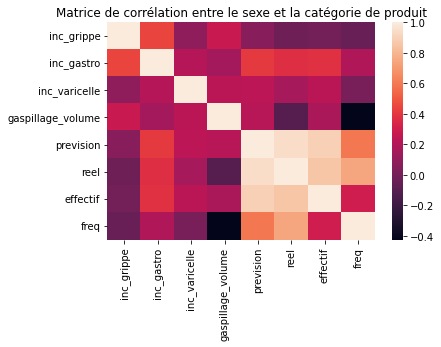

In [205]:
sns.heatmap(num.corr())
plt.title('Matrice de corrélation entre le sexe et la catégorie de produit')
plt.show()

In [206]:
# Création de ma table de contingence
X = "jour"
Y = "poisson"

cont_1 = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_1

poisson,0,1,Total
jour,,,
Jeudi,236,9,245
Lundi,241,15,256
Mardi,188,61,249
Vendredi,90,184,274
Total,755,269,1024


In [207]:
# Regardons la distibution si les variables étaient complétement independantes

tx = cont_1.loc[:,["Total"]]
ty = cont_1.loc[["Total"],:]
n = len(data)
indep = round(tx.dot(ty) / n)

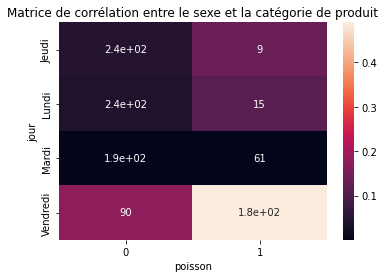

In [208]:
import seaborn as sns


c = cont_1.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre le sexe et la catégorie de produit')
plt.show()

In [209]:
data

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,...,noel,frites,an_chinois,gaspillage_volume,gaspillage_pourcentagereel_moyen_annee,reel_std_annee,prevision,reel,effectif,freq
0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,0,...,0,0,0,1160,NaN,3032.860872,12289,11129,17373,64.059172
1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,0,...,0,0,0,750,NaN,3032.860872,12558,11808,17373,67.967536
2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,0,...,0,0,0,1012,NaN,3032.860872,12753,11741,17373,67.581880
3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,0,...,0,0,0,490,NaN,3032.860872,12812,12322,17373,70.926150
4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,0,...,0,0,0,1007,NaN,3032.860872,12309,11302,17373,65.054970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,2019-11-25,2019-2020,Lundi,48,Novembre,0,0,0,0,0,...,0,0,0,737,NaN,1898.521202,15880,15143,20685,73.207638
1178,2019-11-26,2019-2020,Mardi,48,Novembre,0,0,0,0,0,...,0,0,0,-107,NaN,1898.521202,15847,15954,20685,77.128354
1179,2019-11-28,2019-2020,Jeudi,48,Novembre,0,0,0,0,0,...,0,0,0,968,NaN,1898.521202,15832,14864,20685,71.858835
1180,2019-11-29,2019-2020,Vendredi,48,Novembre,0,0,0,0,0,...,0,0,0,778,NaN,1898.521202,17201,16423,20685,79.395697


In [210]:
data = pd.concat([pd.get_dummies(data["jour"], prefix=None), \
       pd.get_dummies(data["mois"], prefix=None), \
       data], axis=1)

data

,Jeudi,Lundi,Mardi,Vendredi,Avril,Decembre,Fevrier,Janvier,Juillet,Juin,...,noel,frites,an_chinois,gaspillage_volume,gaspillage_pourcentagereel_moyen_annee,reel_std_annee,prevision,reel,effectif,freq
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1160,NaN,3032.860872,12289,11129,17373,64.059172
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,750,NaN,3032.860872,12558,11808,17373,67.967536
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1012,NaN,3032.860872,12753,11741,17373,67.581880
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,490,NaN,3032.860872,12812,12322,17373,70.926150
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1007,NaN,3032.860872,12309,11302,17373,65.054970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,0,1,0,0,0,0,0,0,0,0,...,0,0,0,737,NaN,1898.521202,15880,15143,20685,73.207638
1178,0,0,1,0,0,0,0,0,0,0,...,0,0,0,-107,NaN,1898.521202,15847,15954,20685,77.128354
1179,1,0,0,0,0,0,0,0,0,0,...,0,0,0,968,NaN,1898.521202,15832,14864,20685,71.858835
1180,0,0,0,1,0,0,0,0,0,0,...,0,0,0,778,NaN,1898.521202,17201,16423,20685,79.395697


In [211]:
data.columns

Index(['Jeudi', 'Lundi', 'Mardi', 'Vendredi', 'Avril', 'Decembre', 'Fevrier',
       'Janvier', 'Juillet', 'Juin', 'Mai', 'Mars', 'Novembre', 'Octobre',
       'Septembre', 'date', 'annee_scolaire', 'jour', 'semaine', 'mois',
       'greves', 'ferie', 'veille_ferie', 'retour_ferie', 'vacances',
       'retour_vacances', 'veille_vacances', 'fete_musulmane', 'ramadan',
       'fete_chretienne', 'fete_juive', 'inc_grippe', 'inc_gastro',
       'inc_varicelle', 'menu', 'porc', 'viande', 'poisson', 'bio', 'noel',
       'frites', 'an_chinois', 'gaspillage_volume',
       'gaspillage_pourcentagereel_moyen_annee', 'reel_std_annee', 'prevision',
       'reel', 'effectif', 'freq'],
      dtype='object')

In [212]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [213]:
data.columns

Index(['Jeudi', 'Lundi', 'Mardi', 'Vendredi', 'Avril', 'Decembre', 'Fevrier',
       'Janvier', 'Juillet', 'Juin', 'Mai', 'Mars', 'Novembre', 'Octobre',
       'Septembre', 'date', 'annee_scolaire', 'jour', 'semaine', 'mois',
       'greves', 'ferie', 'veille_ferie', 'retour_ferie', 'vacances',
       'retour_vacances', 'veille_vacances', 'fete_musulmane', 'ramadan',
       'fete_chretienne', 'fete_juive', 'inc_grippe', 'inc_gastro',
       'inc_varicelle', 'menu', 'porc', 'viande', 'poisson', 'bio', 'noel',
       'frites', 'an_chinois', 'gaspillage_volume',
       'gaspillage_pourcentagereel_moyen_annee', 'reel_std_annee', 'prevision',
       'reel', 'effectif', 'freq'],
      dtype='object')

In [214]:

reg_multi = smf.ols('reel~effectif+poisson+Lundi+Mardi+Vendredi+Janvier+Fevrier+Mars\
                    +Avril+Juin+Juillet+Septembre+Octobre+Novembre+Decembre\
                    +noel+bio+porc+viande+frites+veille_ferie+retour_ferie', data=data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     475.2
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:51:35   Log-Likelihood:                -7285.9
No. Observations:                1024   AIC:                         1.462e+04
Df Residuals:                    1001   BIC:                         1.473e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2864.9853    192.399    -14.891   

In [215]:

reg_multi = smf.ols('reel~effectif+poisson+Lundi+Mardi+Vendredi+Janvier+Fevrier+Mars\
                    +Avril+Juin+Juillet+Septembre+Octobre+Novembre+Decembre\
                    +noel+bio+porc+viande+frites+veille_ferie', data=data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     498.3
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:51:35   Log-Likelihood:                -7285.9
No. Observations:                1024   AIC:                         1.462e+04
Df Residuals:                    1002   BIC:                         1.472e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2865.7357    192.277    -14.904   

In [216]:
reg_multi = smf.ols('reel~effectif+poisson+Lundi+Mardi+Vendredi+Janvier+Fevrier+Mars\
                    +Avril+Juin+Juillet+Septembre+Octobre+Decembre\
                    +noel+bio+porc+viande+frites+veille_ferie', data=data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     523.5
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:51:35   Log-Likelihood:                -7286.1
No. Observations:                1024   AIC:                         1.461e+04
Df Residuals:                    1003   BIC:                         1.472e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2863.8499    192.200    -14.900   

In [217]:
reg_multi = smf.ols('reel~effectif+poisson+Lundi+Vendredi+Janvier+Fevrier+Mars\
                    +Avril+Juin+Juillet+Septembre+Octobre+Decembre\
                    +noel+bio+porc+viande+frites+veille_ferie', data=data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     551.4
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:51:36   Log-Likelihood:                -7286.2
No. Observations:                1024   AIC:                         1.461e+04
Df Residuals:                    1004   BIC:                         1.471e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2857.8683    191.775    -14.902   

In [218]:
reg_multi = smf.ols('reel~effectif+poisson+Lundi+Vendredi+Janvier+Fevrier+Mars\
                    +Avril+Juin+Juillet+Septembre+Octobre+Decembre\
                    +noel+porc+viande+frites+veille_ferie', data=data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     582.5
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:51:36   Log-Likelihood:                -7286.3
No. Observations:                1024   AIC:                         1.461e+04
Df Residuals:                    1005   BIC:                         1.470e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2875.4339    185.984    -15.461   

In [219]:
reg_multi = smf.ols('reel~effectif+poisson+Lundi+Vendredi+Janvier+Fevrier+Mars\
                    +Juin+Juillet+Septembre+Octobre\
                    +noel+porc+viande+frites+veille_ferie', data=data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     656.0
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:51:36   Log-Likelihood:                -7286.8
No. Observations:                1024   AIC:                         1.461e+04
Df Residuals:                    1007   BIC:                         1.469e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2885.1972    183.867    -15.692   

In [220]:
Y = data['reel']

In [221]:
X = data[["effectif","poisson","Lundi","Vendredi","Janvier","Fevrier","Mars"\
                    ,"Avril","Juin","Juillet","Septembre","Octobre","Decembre"\
                    ,"noel","porc","viande","frites","veille_ferie"]]

In [222]:
df = data
#On commence à entrainer le modèle à partir de l'année scoalire 2015-2016
#On test sur l'année 2018-2019
N_START = len (df) - len(df[df['annee_scolaire']=="2015-2016"])- len(df[df['annee_scolaire']=="2016-2017"])- len(df[df['annee_scolaire']=="2017-2018"])- len(df[df['annee_scolaire']=="2018-2019"])- len(df[df['annee_scolaire']=="2019-2020"])
N_INT = len (df) - len(df[df['annee_scolaire']=="2018-2019"])- len(df[df['annee_scolaire']=="2019-2020"])-1
N_END = len (df) - len(df[df['annee_scolaire']=="2019-2020"])-1


mod = sm.regression.linear_model.OLS(Y.iloc[N_START:N_INT], X.iloc[N_START:N_INT])

In [223]:
res = mod.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                   reel   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.722e+04
Date:                Fri, 02 Dec 2022   Prob (F-statistic):                        0.00
Time:                        15:51:37   Log-Likelihood:                         -2472.0
No. Observations:                 351   AIC:                                      4980.
Df Residuals:                     333   BIC:                                      5050.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [224]:
from sklearn.metrics import mean_squared_error, r2_score

R2 :  -0.6427617967918882


TypeError: object of type 'int' has no len()

<Figure size 432x288 with 0 Axes>

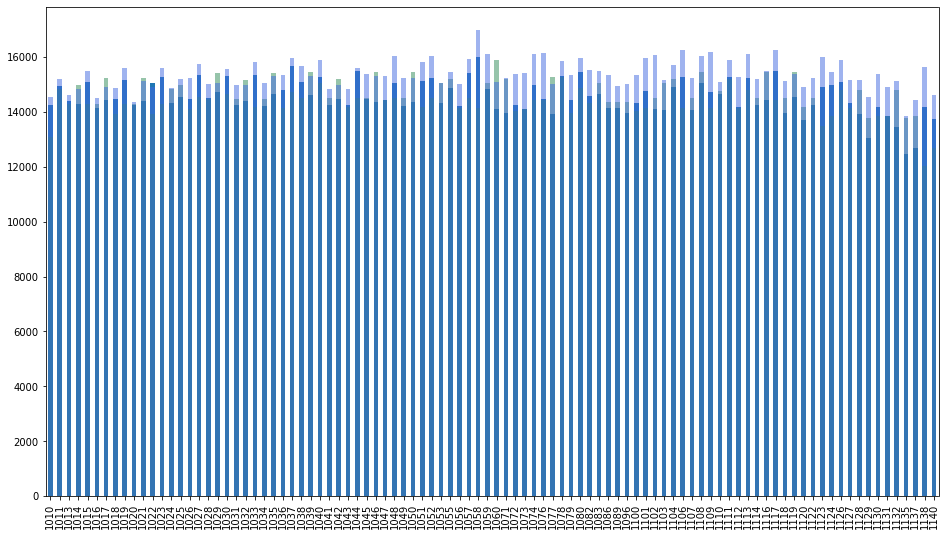

In [243]:
y_pred = res.predict(X.iloc[N_INT:N_END]) 
y_true = data["reel"].iloc[N_INT:N_END]
y_prevision = data["prevision"].iloc[N_INT:N_END]

dfm = data
print("R2 : ",r2_score(y_true, y_pred))
plt.figure(figsize=(16,9))
y_true.plot(label="fréquentation réelle")
y_pred.plot(label="fréquentation estimée")
y_prevision.plot(label="prévisions des agents")

plt.title("Estimation de la fréquentation sur l'année scolaire 2018-2019", fontsize=15)
plt.ylabel("Fréquentation (en nombre de personnes)", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.legend()

In [226]:
data["effectif"].iloc[N_INT:N_END]

1007    19958
1009    20344
1010    20344
1011    20344
1013    20344
        ...  
1130    20344
1131    20344
1132    20344
1135    20344
1137    20344
Name: effectif, Length: 96, dtype: int64

In [227]:
X_pred = X.iloc[N_INT:N_END].join(df[["prevision", "reel"]])
X_pred["pred"] = y_pred * 1.03
X_pred["gaspillage"] = (X_pred["prevision"] - X_pred["reel"]) / X_pred["prevision"]
X_pred["gaspi_pred"] = (X_pred.pred - X_pred.reel) / X_pred.pred

In [228]:
gaspi_reel = X_pred.gaspillage.mean()*100
gaspi_pred = X_pred.gaspi_pred.mean()*100
print("gaspillage réel en pourcentage est de :  %.2f  " % gaspi_reel )
print("gaspillage avec nos prédictions:  %.2f " % gaspi_pred)

gaspillage réel en pourcentage est de :  5.32  
gaspillage avec nos prédictions:  2.83 


In [229]:
print(len(X_pred[X_pred.gaspillage<0]), "jours réels avec un manque de repas")
print(len(X_pred[X_pred.gaspi_pred<0]), "jours estimés pour lesquels il y aurait eu un manque de repas")
print(X_pred[X_pred.gaspi_pred<0].pred-X_pred[X_pred.gaspi_pred<0].reel)

1 jours réels avec un manque de repas
5 jours estimés pour lesquels il y aurait eu un manque de repas
1110   -105.105109
1111    -49.024323
1124   -401.713138
1127   -132.648715
1135    -52.041406
dtype: float64


In [230]:
X = data[["effectif","poisson","Lundi","Vendredi","Janvier","Fevrier","Mars"\
                    ,"Avril","Juin","Juillet","Septembre","Octobre","Decembre"\
                    ,"noel","porc","viande","frites","veille_ferie"]]

mod = sm.regression.linear_model.OLS(Y.iloc[N_START:N_INT], X.iloc[N_START:N_INT])

res = mod.fit()
y_pred = res.predict(X.iloc[N_INT:N_END]) 
print("R2 : ",r2_score(y_true, y_pred))
#0.5281720802388863 san la supresion des gaspillages extremes

R2 :  0.7433260261912249


c:\bda\tools\python-3.6.8-amd64\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\bda\tools\python-3.6.8-amd64\lib\site-packages\seaborn\distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
c:\bda\tools\python-3.6.8-amd64\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\bda\tools\python-3.6.8-amd64\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


,prevision,reel,diff


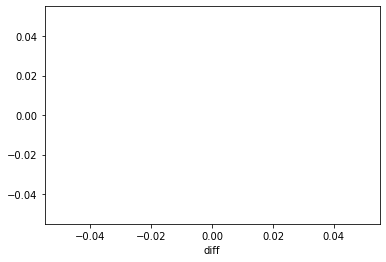

In [231]:
# y_diff = y_prevision["prevision"] - y_true["reel"]
y_prevision_df =  pd.DataFrame(y_prevision)
y_prevision_df.set_axis(['prevision'], axis='columns', inplace=True)
y_prevision_df


y_true_df =  pd.DataFrame(y_true)
y_true_df.set_axis(['reel'], axis='columns', inplace=True)
y_true_df


ydiff =y_prevision_df.merge(y_true_df, left_index=True, right_index=True, how='inner')
ydiff
# prevision_df.set_axis(['freq_prev'], axis='columns', inplace=True)
# merged = a_prevoir.merge(prevision_df, left_index=True, right_index=True, how='inner')
# merged[['freq', 'freq_prev']]

ydiff['diff']= ydiff['prevision'] - ydiff['reel']
ydiff.sort_values('diff',ascending=False)

# ydiff.plot('diff')
# sns.distplot(ydiff['diff'])

ydiff_greve = ydiff[ydiff['diff'] > 2000]
sns.distplot(ydiff_greve['diff'])
ydiff_greve


In [232]:
df.drop([5,6], axis=0, inplace=True)

In [238]:
test = data.loc[1024]
pd.DataFrame(test)

,1024
Jeudi,0
Lundi,1
Mardi,0
Vendredi,0
Avril,0
Decembre,0
Fevrier,0
Janvier,0
Juillet,0
Juin,0
